# Install and Import Dependencies

In [24]:
!pip3 install torch torchvision torchaudio
!pip install easyocr

In [25]:
import easyocr
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read in images or video

In [26]:
IMAGE_PATH = 'speed.png'

In [27]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[np.int32(86), np.int32(53)],
   [np.int32(195), np.int32(53)],
   [np.int32(195), np.int32(129)],
   [np.int32(86), np.int32(129)]],
  '40',
  np.float64(0.9999366117282888))]

# Draw Results

In [28]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = tuple(result[0][1])
font = cv2.FONT_HERSHEY_SIMPLEX

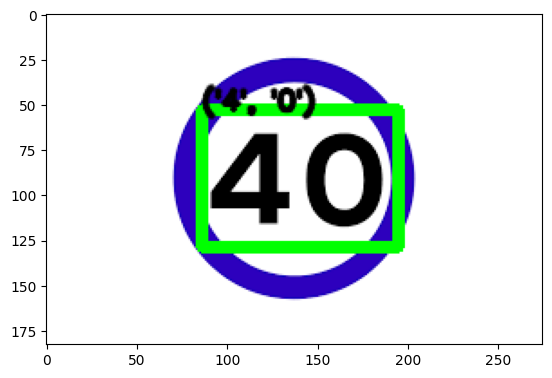

In [29]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
img = cv2.putText(img, str(text), top_left, font, 0.5, (0, 0, 0), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

# Handling Multiple Lines

In [35]:
IMAGE_PATH = "sign.png"
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[np.int32(19), np.int32(181)],
   [np.int32(165), np.int32(181)],
   [np.int32(165), np.int32(201)],
   [np.int32(19), np.int32(201)]],
  'HEAD PROTECTION',
  np.float64(0.9778256296390029)),
 ([[np.int32(31), np.int32(201)],
   [np.int32(153), np.int32(201)],
   [np.int32(153), np.int32(219)],
   [np.int32(31), np.int32(219)]],
  'MUST BE WORN',
  np.float64(0.9719649866726915)),
 ([[np.int32(39), np.int32(219)],
   [np.int32(145), np.int32(219)],
   [np.int32(145), np.int32(237)],
   [np.int32(39), np.int32(237)]],
  'ON THIS SITE',
  np.float64(0.9683973478739152))]

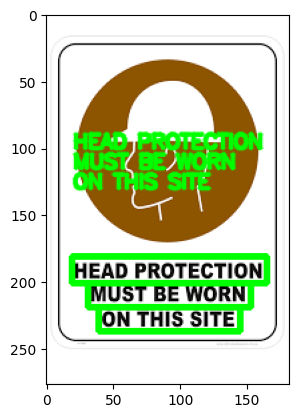

In [36]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()